# seaborn可视化(3) — 分布
类型|函数|说明
--|:--:|--:
回归|regplot(x,y,data) |图数据与线性回归模型拟合
回归|lmplot(x,y,data)|图数据和回归模型适用于整个FacetGrid
回归|residplot(x,y,data) |画出线性回归的残差

In [12]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 
sns.set(font = 'SimHei')
sns.set(font_scale=1.3)
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 绘制线性回归模型
```python
"""
regplot与lmplot  : regplot()接受各种格式的x和y变量，包括简单的numpy数组、
panda系列对象，或者作为传递给数据的panda DataFrame对象中变量的引用。
相反，lmplot()需要数据作为参数，x和y变量必须指定为字符串。
这种数据格式称为“long-form”或“tidy”数据
"""
```

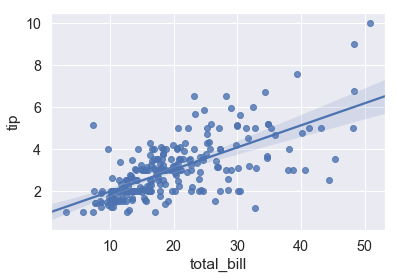

In [13]:
sns.regplot(x="total_bill", y="tip", data=tips)

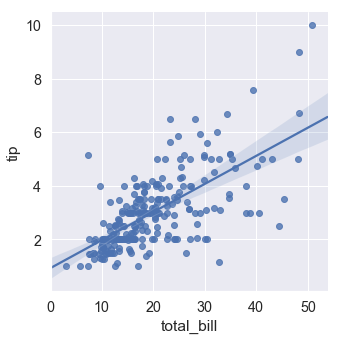

In [14]:
sns.lmplot(x='total_bill',y='tip',data=tips)

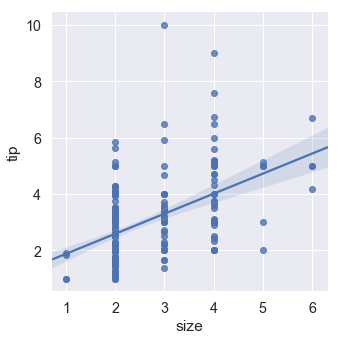

In [15]:
"""
当其中一个变量取离散值时，可以拟合线性回归，
但是这种数据集产生的简单散点图往往不是最优的:
"""
sns.lmplot(x="size", y="tip", data=tips)

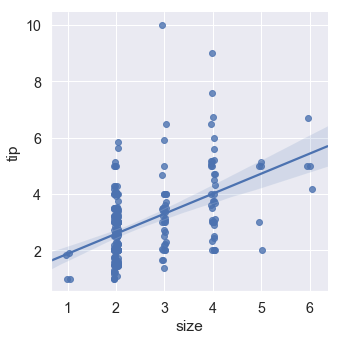

In [16]:
"""
一种选择是在离散值中添加一些随机噪声(“抖动”)，使这些值的分布更加清晰。
注意抖动只适用于散点图数据，不影响回归曲线拟合本身
"""
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05)

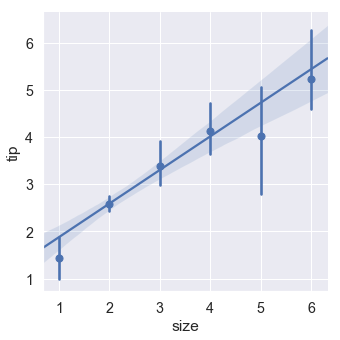

In [23]:
"""
第二种选择是将每个离散箱中的观察值折叠起来，
从而绘制出一个中央趋势估计值，以及一个置信区间
"""
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

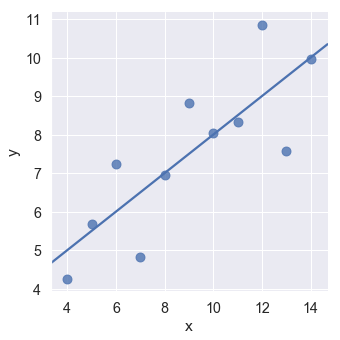

In [24]:
#拟合不同类型的模型
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80})

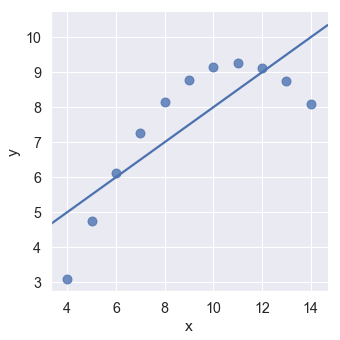

In [25]:
"""
第二个数据集中的线性关系是一样的，但是从图中可以看出这不是一个好的模型
"""
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80})

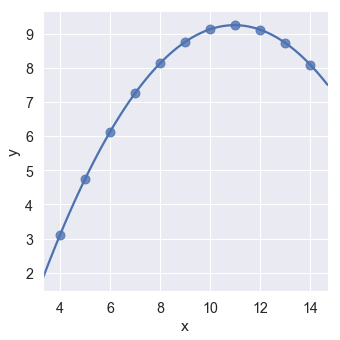

In [26]:
"""
在存在这种高阶关系的情况下，lmplot()和regplot()可以拟合多项式回归模型
来探索数据集中各种简单的非线性趋势
"""
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80})

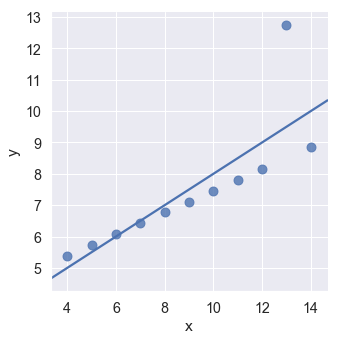

In [34]:
"""
另一个不同的问题是由于“异常值”的观测结果由于某些原因而偏离了所研究的主要关系
"""
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80})

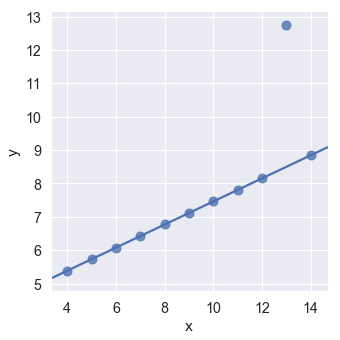

In [35]:
"""
在异常值存在的情况下，拟合一个鲁棒回归是有用的，
该回归使用一个不同的损失函数来降低相对较大的残差的权重
"""
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80})

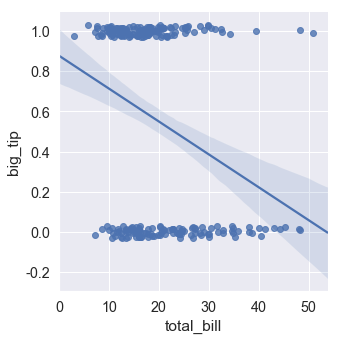

In [42]:
"""
当y变量为二进制时，简单线性回归也“有效”，但提供了不可信的预测
"""
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03)

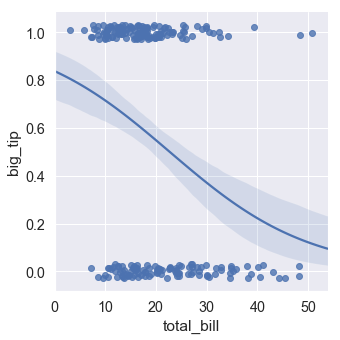

In [44]:
"""
这种情况下的解是拟合logistic回归，使回归曲线显示给定x值y = 1的估计概率
"""
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03)


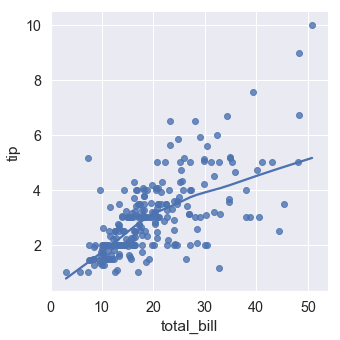

In [45]:
"""
另一种完全不同的方法是使用低通滤波器拟合非参数回归。这种方法的假设最少，
尽管它是计算密集型的，因此目前根本没有计算置信区间
"""
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True)

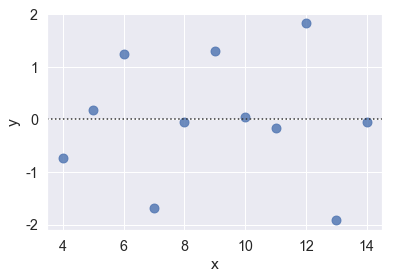

In [46]:
"""
residplot()
residplot()函数可以作为检查简单回归模型是否适合数据集的有用工具。
它拟合并去除一个简单的线性回归，然后绘制每个观测值的残差。
理想情况下，这些值应该随机分布在y = 0附近:
Signature: 画出线性回归的残差
sns.residplot(
    ['x', 'y', 'data=None', 'lowess=False', 'x_partial=None', 'y_partial=None',
    'order=1', 'robust=False', 'dropna=True', 'label=None', 'color=None', 
    'scatter_kws=None', 'line_kws=None', 'ax=None'],)  
"""
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80})

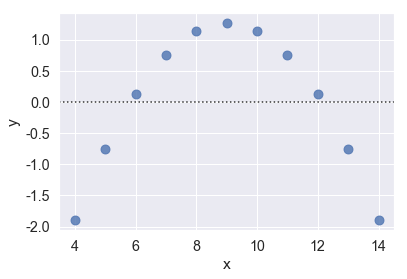

In [47]:
#如果残差中存在结构，说明简单线性回归是不合适的
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80})

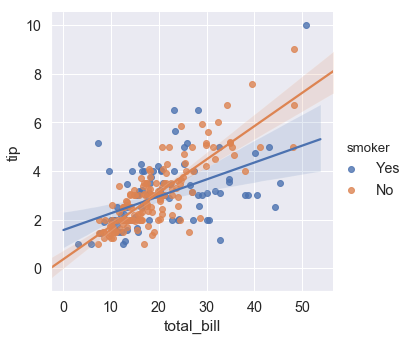

In [48]:
#其他变量条件作用
#区分关系的最好方法是在同一坐标轴上绘制两个层次，并使用颜色来区分它们
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)


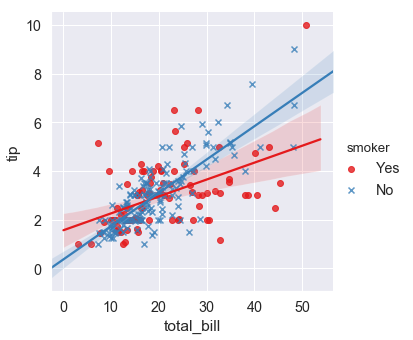

In [49]:
"""
除了颜色之外，还可以使用不同的散点标记使图更好地重现为黑色和白色
"""
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1")


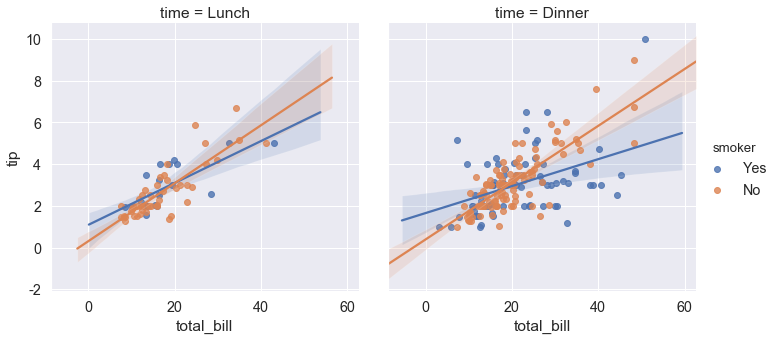

In [50]:
#更多条件
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)


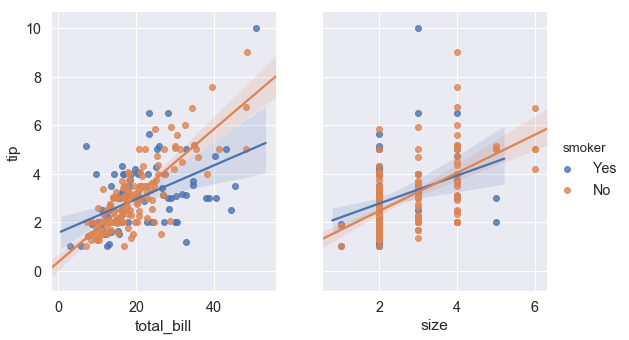

In [51]:
#多重结合
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg")

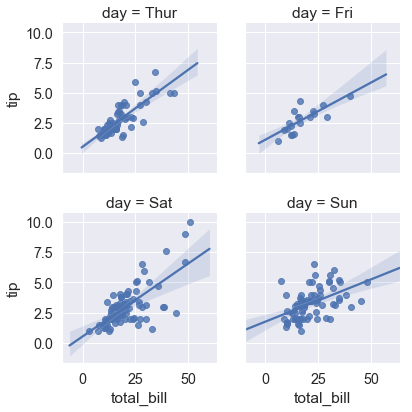

In [52]:

sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, height=3)

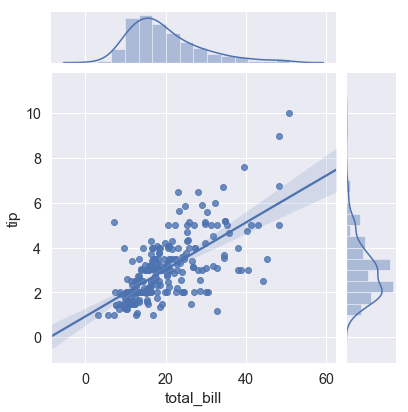

In [53]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")